## Exercise 3

Download historical data for COVID-19 cases by state from The New York Times's GitHub at https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv. (The full repository including licensing terms is at github.com/nytimes/covid-19-data). As this is an ongoing public health crisis, include in your readme the date you downloaded the data (2 points). Since you are using data from an external source, be sure to credit The New York Times as your data source in your readme as well (2 points).

The data was downloaded on September 13, 2022 at 10:50 AM. 

Citation : The New York Times. (2021). Coronavirus (Covid-19) Data in the United States. Retrieved [September 13, 2022] , from https://github.com/nytimes/covid-19-data."

_Below is the code to load the datset_

In [3]:
## Importing the libraries and loading the dataset 

import pandas as pd
import seaborn as sns
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv("/Users/mahimakaur/Desktop/us-states.csv")

In [4]:
data ##To view how to the dataframe looks like

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
51185,2022-09-12,Virginia,51,2062984,21610
51186,2022-09-12,Washington,53,1796343,14195
51187,2022-09-12,West Virginia,54,592324,7334
51188,2022-09-12,Wisconsin,55,1846100,15138


**Part1**: Make a function that takes a list of state names and plots their new cases vs date using overlaid line graphs, one for each selected state. (Note: the data file shows running totals, so you'll have to process it to get new case counts.) Be sure to provide a way to tell which line corresponds to what state (one possibility: using colors and a legend). If your approach has any specific limitations, explain them in your readme. (4 points)

_Below is the code for the function that takes a list of state names and plots their new cases vs date using overlaid line graph._

In [5]:
## Changing the dates format 

data['date']= pd.to_datetime(data['date'],format='%Y-%m-%d')

## Creating a Function to plot the graph

def state_plot(states):
## using matplotlib.pyplot and seaborn to draw the overlaid line graphs, one for each selected state.
    plt.figure(figsize = (15,15))
    for state in states:
        data1 = data[data['state'] == state]
        data1['newcases'] = data1['cases'].diff()  ##Calculating new case counts from the running totals
        plt.plot(data1['date'], data1['newcases'], label = state)
    plt.legend(loc = 'upper left')
    plt.title('New Cases per Day per State', loc = 'center', weight='bold')
    plt.xlabel('Date', weight='bold')
    plt.ylabel('Daily New Infections', weight='bold')
    plt.show()
    sns.set()
    sns.set_style('whitegrid')

**Part2**: Test the above function and provide examples of it in use. (4 points)

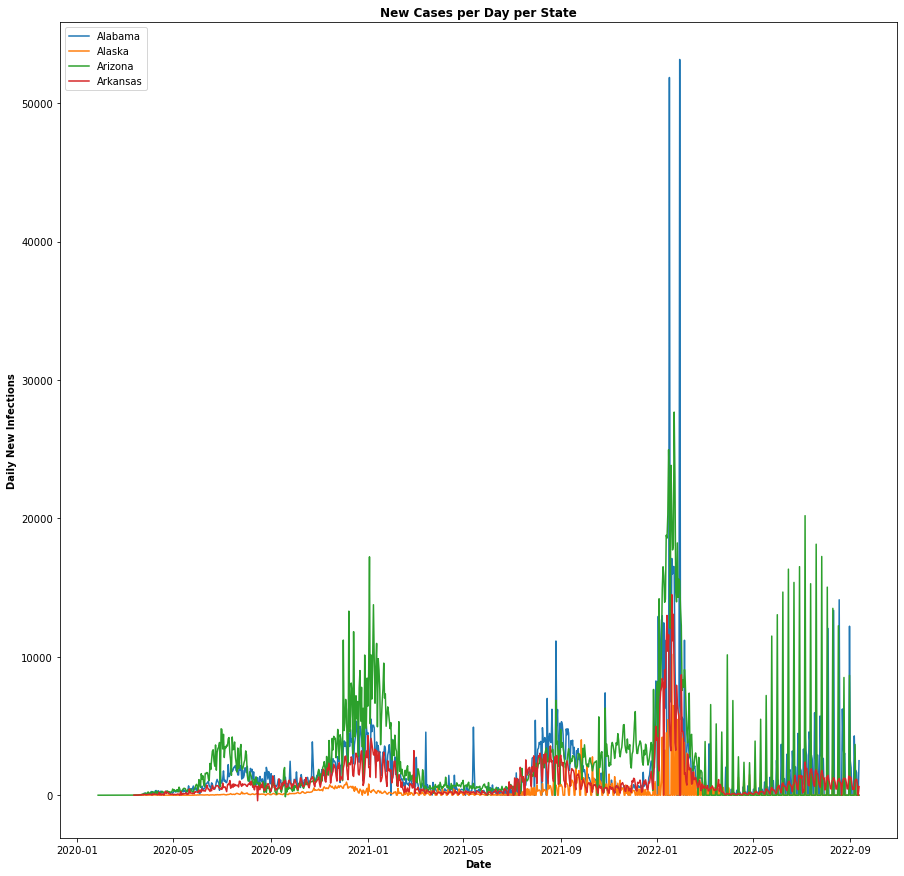

In [6]:
## Testing the above function 

states =  ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
state_plot(states)

**About the graph**: In the graph, the x-axis indicates the dates, y-axis indicates the daily new cases tested positive for COVID-19 infection of each selected state. Colors of lines indicate different states.

**Part3**: Make a function that takes the name of a state and returns the date of its highest number of new cases. (4 points)

_Below is the function that takes the name of a state and returns the date of its highest number of new cases._

In [7]:
## Creating a function that takes the name of a state and returns the date of its highest number of new cases. 

def max_case_date(state):
    data1 = data[data['state'] == state]
    data1['newcases'] = data1['cases'].diff() 
    max_case = data1['newcases'].max()
    date = data1[data1['newcases'] == max_case]['date']
    return (date.iloc[0].date())

print(max_case_date('California'))
print(max_case_date('Arizona'))

2022-01-10
2022-01-22


**Part4**: Make a function that takes the names of two states and reports which one had its highest number of daily new cases first and how many days separate that one's peak from the other one's peak. (5 points)

_Below is the function that takes the names of two states and reports which one had its highest number of daily new cases first and how many days separate that one's peak from the other one's peak._

In [8]:
## Creating the function that takes the names of two states and reports which one had its highest number of daily 
## new casesfirst and how many days separate that one's peak from the other one's peak

def peak(state1,state2):
    date1 = (max_case_date(state1))
    date2 = (max_case_date(state2))
    if date1 > date2:
        print(state2,'had highest number of daily new cases first by', abs((date1 - date2).days), 'days', 'than', state1,'.')
    elif date1 < date2:
         print(state1,'had highest number of daily new cases first by',abs((date2 - date1).days), 'days', 'than', state2,'.')
    else:
        print(State1, "and", State2, "have highest number of cases on the same day.")
            

**Part5**:Test the above function and provide examples of it in use. (4 points)

_Below is the code to test the above function._

In [9]:
## Testing the above function with examples. 

peak('California', 'Arizona')
peak('New York', 'Arizona')
peak('Connecticut', 'New York')
peak('Alabama', 'Arizona')

California had highest number of daily new cases first by 12 days than Arizona .
New York had highest number of daily new cases first by 14 days than Arizona .
New York had highest number of daily new cases first by 2 days than Connecticut .
Arizona had highest number of daily new cases first by 7 days than Alabama .
